# Homework 7

## Your Name Here (or your names here if you are pair programming)

## Supprt Vector Machine 

In [2]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report
from sklearn import svm


from matplotlib import pyplot
import matplotlib.cm as cm
from random import sample

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Your allowed to use only the above libraries that are imported. No other libs should be used in this assignment. 

## Heart Dataset 

In this Assignment we will work with some patients dataset. 

We have access to 303 patients data. The features are listed below. 

In [3]:
# Your code here
heart_df = pd.read_csv("Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Task - 1 Implement SVM using libraries (4 points)
We want to use **Suppert Vector Machine** to perdict if the patients will have heart problems or not. The column "Target" in our datasets includes data about heart diseases. If the patient had heart disease we have a 1 and if not a zero. 

Prepare your data set for predicting heart disease ("Target" column) out of 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**) 


Split your data into 80% traning data and 20% test data, and implement Support Vector Machine using Scikit-Learn. 





In [6]:
# Split dataset in features and target variable
feature_cols = ['Age', 'Sex', 'Chol']
X = heart_df[feature_cols] # Features
y = heart_df['Target'] # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

# Training data in SVM model and outputting accuracy score
model = svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy Score of SVM:", accuracy_score(y_test, y_pred))

Accuracy Score of SVM: 0.5081967213114754


# Task 2 - (4 points)

Cacluate the accuracy, Precision, Recall and F1 score of your **SVM** implementaion from Task 1. 
Print the results. 

You may use library methods for this task if you choose to.


In [7]:
# Print classification report of SVM implementation
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

          No       0.56      0.69      0.62        35
         Yes       0.39      0.27      0.32        26

    accuracy                           0.51        61
   macro avg       0.47      0.48      0.47        61
weighted avg       0.49      0.51      0.49        61



# Task 3 - Implement SVM without using libraries  - (4 points)

Implement SVM from scratch using Hinge Loss function and Gradient Descent. 
Try to produce the same result as you get from the libraries. 


* Do as many iterations as needed 
* Do maximum **100 iterations**
* Use a very small learning rate for checking your GD implementation. 
* Your are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher. 
* Visualize your costs. 
* No need to add an y-intercept in this task. 
* You can use libraries to report accuracy, Precision, Recall and F1. 



[ 0.02011786  0.00090987 -0.02429832] 0.0093


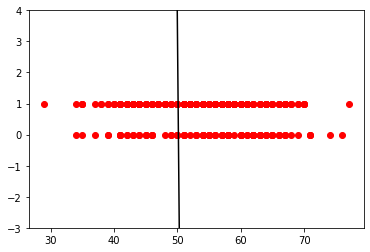

In [12]:
# Converting Target column to 1's and 0's.
y_train1 = heart_df['Target'].replace({'No': 0, 'Yes': 1}).astype(float)
y_train = y_train1.values
# Class for SVM implementation without libraries.
class SVM:
    
    def __init__(self, learning_rate=0.0001, lambda_param=0.01, n_iters=100):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
  

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# Run SVM with training data.
clf = SVM()
clf.fit(X_train.values,y_train)
# Prints coefficients and intercept
print(clf.w,clf.b)

# Function to visualize SVM on graph.
def visualize_svm():
  def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  plt.scatter(X.iloc[:, 0], X.iloc[:, 1], marker="o", c='red')

  x0_1 = np.amin(X.iloc[:, 0])
  x0_2 = np.amax(X.iloc[:, 0])

  x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
  x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

  x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
  x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

  x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
  x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

  ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
  ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
  ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

  x1_min = np.amin(X.iloc[:, 1])
  x1_max = np.amax(X.iloc[:, 1])
  ax.set_ylim([x1_min - 3, x1_max + 3])

  plt.show()
visualize_svm()



# Task 4 - Compare SVM results with Logistic Regression - (4 points)

Which model performs better here? Compare your results wit the logistic regression. You can use libraries for this task, it is not necessary to implement logistic regression from sratch.


***Logistic Regression performs better here in terms of accuracy score and overall precision, recall, and F1 score. ***

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)
# Accuracy for SVM
model = svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy Score (SVM):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Accuracy score for LR
model_lr = LogisticRegression(penalty='none', fit_intercept=False)
model_lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
print("Accuracy Score (Logistic Regression): ", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy Score (SVM): 0.5081967213114754
              precision    recall  f1-score   support

          No       0.56      0.69      0.62        35
         Yes       0.39      0.27      0.32        26

    accuracy                           0.51        61
   macro avg       0.47      0.48      0.47        61
weighted avg       0.49      0.51      0.49        61

Accuracy Score (Logistic Regression):  0.7049180327868853
              precision    recall  f1-score   support

          No       0.84      0.60      0.70        35
         Yes       0.61      0.85      0.71        26

    accuracy                           0.70        61
   macro avg       0.73      0.72      0.70        61
weighted avg       0.74      0.70      0.70        61



# Task 5 - Apply a kernel function to improve SVM performance (4 points)

Use the Scikit-learn librariy and apply a kernel function to improve the SVM performance. Check if this is possible. 


***It is possible to improve the SVM performance if using a polynomial kernel. It improved accuracy from .51 to .59 with just a kernel function added in.***

In [14]:
# Adding polynomial kernal and outputting classification report to check performance.
svm_ker = svm.SVC(kernel='poly', degree=8)
svm_ker.fit(X_train, y_train)
y_pred_ker = svm_ker.predict(X_test)
print(classification_report(y_test, y_pred_ker))

              precision    recall  f1-score   support

          No       0.60      0.83      0.70        35
         Yes       0.54      0.27      0.36        26

    accuracy                           0.59        61
   macro avg       0.57      0.55      0.53        61
weighted avg       0.58      0.59      0.55        61

